# Gathering historial GBP/USD data
Data is gathered from Yahoo Finance using pandas-datareader. The data required is the foundations of a candlestick {open, close, high, low}.

In [1]:
import pandas_datareader as pdr

In [2]:
'''
Gathers candlestick data of specified curreny pair.
Data collected from Yahoo Finance.
Information returned:
    - Date
    - High price
    - Low price
    - Open price
    - Close price
    - Adj Close price

Args:
    - curency_pair: (String) currency pair to fetch, must match source information.
    - start_date: (String-Date) starting date to fetch historical data. M-D-Y
'''
def get_currency_data(currency_pair, start_date):
    currency_pair = currency_pair
    
    df = pdr.data.DataReader(currency_pair, data_source='yahoo', start=start_date)
    
    return df.reset_index()
    

In [76]:
cdata = get_currency_data(currency_pair='GBPUSD=X', start_date='9-1-2020')
print(cdata)


        Date      High       Low      Open     Close  Volume  Adj Close
0 2020-09-30  1.298027  1.282298  1.291823  1.291756       0   1.291756
1 2020-10-01  1.295102  1.283961  1.288560  1.288627       0   1.288627
2 2020-10-04  1.298752  1.290156  1.292808  1.293109       0   1.293109
3 2020-10-05  1.300898  1.292340  1.299207  1.299258       0   1.299258
4 2020-10-06  1.292925  1.285033  1.288477  1.288328       0   1.288328
5 2020-10-07  1.296933  1.289657  1.291656  1.291756       0   1.291756
6 2020-10-08  1.301507  1.292674  1.293929  1.294046       0   1.294046


# Plotting time series-data

In [77]:
import pandas as pd
import plotly.graph_objects as go

In [78]:
'''
Function plots candlestick chart using pyplot.
'''

''' Depreciating function to convert to matplotlib
def plot_candle(data):
    fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'], 
                high=data['High'],
                low=data['Low'], 
                close=data['Close'])
    ])

    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()
'''


" Depreciating function to convert to matplotlib\ndef plot_candle(data):\n    fig = go.Figure(data=[go.Candlestick(x=data['Date'],\n                open=data['Open'], \n                high=data['High'],\n                low=data['Low'], \n                close=data['Close'])\n    ])\n\n    fig.update_layout(xaxis_rangeslider_visible=False)\n    fig.show()\n"

In [79]:
#plot_candle(cdata)

### Matplotlib implmentation

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [81]:
'''
plot_candlestick function creates a candlestick chart from the pandas dataframe using matplotlib.
Accredication to "https://gist.github.com/shaan2909/402b3aa94de66e463e96cc2f5ebfe714#file-candles1-ipynb" for the function.
'''
def plot_candlestick(data):

    color_function=None
    def default_color(index, open_price, close_price, low, high,):
            return 'r' if open_price[index] > close_price[index] else 'g'
    color_function = color_function or default_color

    open_price = data['Open']
    close_price = data['Close']
    low = data['Low']
    high = data['High']

    oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
    oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)

    fig, ax1 = plt.subplots(1, 1)
    fig.tight_layout()

    x = np.arange(len(cdata))
    candle_colors = [color_function(i, open_price, close_price, low, high) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x , low, high, color=candle_colors, linewidth=1)
    ax1.xaxis.grid(True)
    ax1.yaxis.grid(True)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])

    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (data.iloc[1][0] - data.iloc[0][0]).days == 0 else 'day'
    time_format = '%d-%m-%Y'
    if (frequency == 'minute'):
        time_format = '%H:%M'

    # Set X axis tick labels.
    #plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')

    return fig


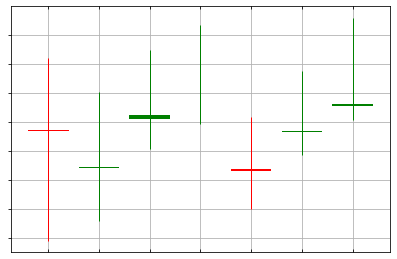

In [82]:
candlestick_chart = plot_candlestick(cdata)

# Obtaining trend